# Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
X_train.shape #so we have 50000 images with 32 by 32 resolution and 3 represents the RGB channel..

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape #50000 samples and each image has a target class associated with it!

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Data Visualisation

[5]


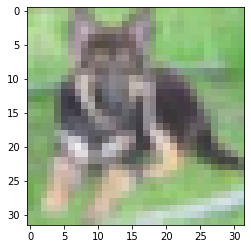

In [7]:
i = 156
plt.imshow(X_train[i])
print(y_train[i])

y train gives the target class. The previous image has y train equal to the 5 th class that is dog


[7]


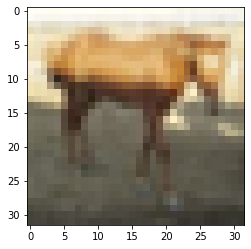

In [8]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i]) #now this is 7th class that is horse.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


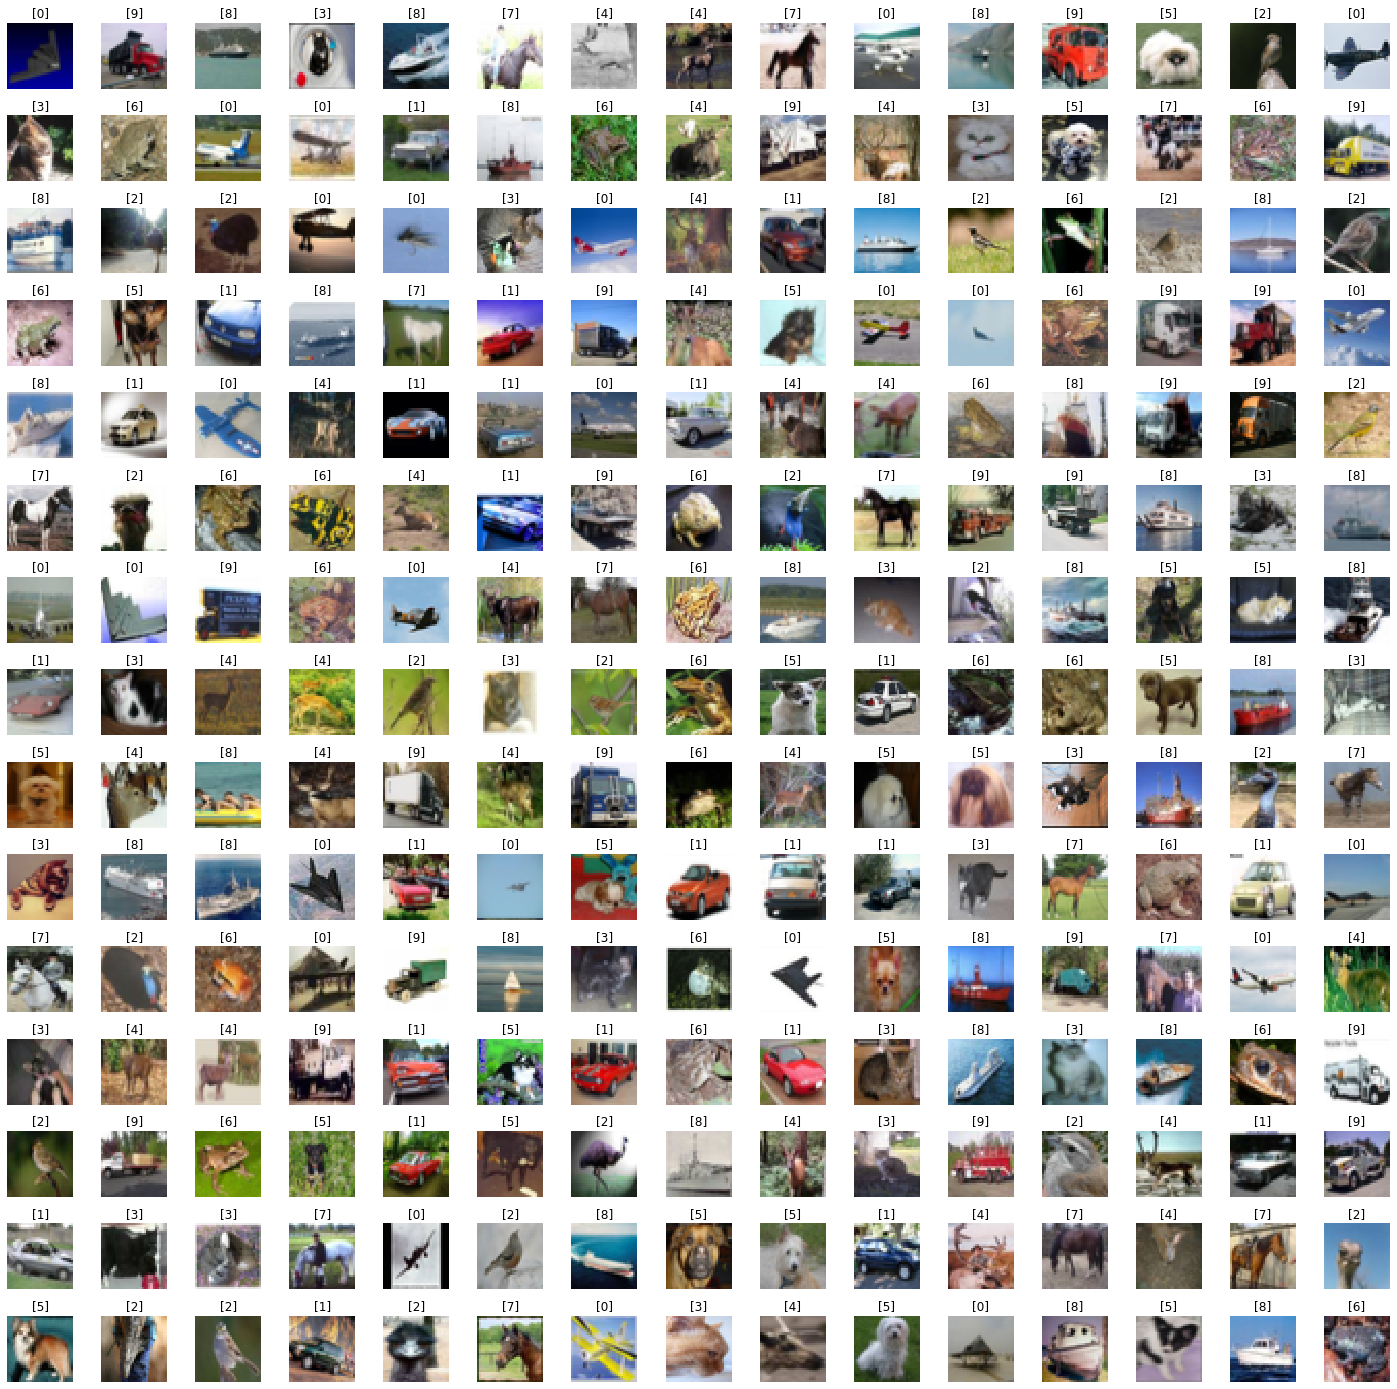

In [9]:
w_grid = 15
l_grid = 15

fig,axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel() #flatten the 15 by 15 matrix into 125 sized array
n_training = len(X_train)
for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    

Looks Great!

By now we have visualised the images using subplots and grid

In [10]:
n_training

50000

In [11]:
#lets convert the datatype of x_train




In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
num_cat = 10

In [14]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
from tensorflow.keras import utils

In [16]:
y_train = utils.to_categorical(y_train,num_cat) #(data,number of classes) # so we are converting y train into catagorical form

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Here only 1 class is the catogary 1 and rest 0

In [18]:
y_test = utils.to_categorical(y_test,num_cat)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X_train #so the array represents bunch of numbers which is the value of pixels of the image

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [21]:
#there are 255 pixel numbers from 0 to 255. So to normalise we divide the data by 255

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [24]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [25]:
#now the numbers range from 0 to 1 and hence are normalised!

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
Input_shape = X_train.shape[1:]

In [28]:
Input_shape

(32, 32, 3)

# Train the Model

In [29]:
from tensorflow.keras.models import Sequential #Keras is an api that sits on top of tensorflow. Moreover tensorflow is google's plateform to built as deep learning model!
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [30]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 64,kernel_size =(3,3),activation = 'relu',input_shape = Input_shape ))
cnn_model.add(Conv2D(filters= 64,kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))
cnn_model.add(Conv2D(filters= 128,kernel_size =(3,3),activation = 'relu')) #we dont specify the input shape again since already did once
cnn_model.add(Conv2D(filters= 128,kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3)) #now the convolutional layer is more deep
#fully connected neural network -
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512,activation = 'relu'))
cnn_model.add(Dense(units = 512,activation = 'relu'))
cnn_model.add(Dense(units = 10,activation = 'softmax')) #since  this is the last layer and we have 10 classes there has to be 10 neurons


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The last layer had activation equl to softmax since we need to genrate binary outputs and not continous 

# Model Evaluation

In [31]:
from tensorflow.keras.optimizers import RMSprop

In [32]:
rms = RMSprop

In [33]:
cnn_model.compile(loss= 'categorical_crossentropy',optimizer =rms(lr=0.001),metrics= ['accuracy'])

In [34]:
history = cnn_model.fit(X_train,y_train,batch_size=32,epochs=4,shuffle=True)

Epoch 1/4
50000/50000 [==============================] - 283s 6ms/sample - loss: 1.5914 - acc: 0.4258
Epoch 2/4
50000/50000 [==============================] - 282s 6ms/sample - loss: 1.1591 - acc: 0.5980
Epoch 3/4
50000/50000 [==============================] - 283s 6ms/sample - loss: 1.0522 - acc: 0.6422
Epoch 4/4
50000/50000 [==============================] - 285s 6ms/sample - loss: 1.0150 - acc: 0.6595


In [35]:
evaluation = cnn_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 13s 1ms/sample - loss: 0.9998 - acc: 0.6515


In [36]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes #so here we are putting the testing imsges for prediction

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [42]:
y_test #to return back the decimal values argmax(1) already done

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

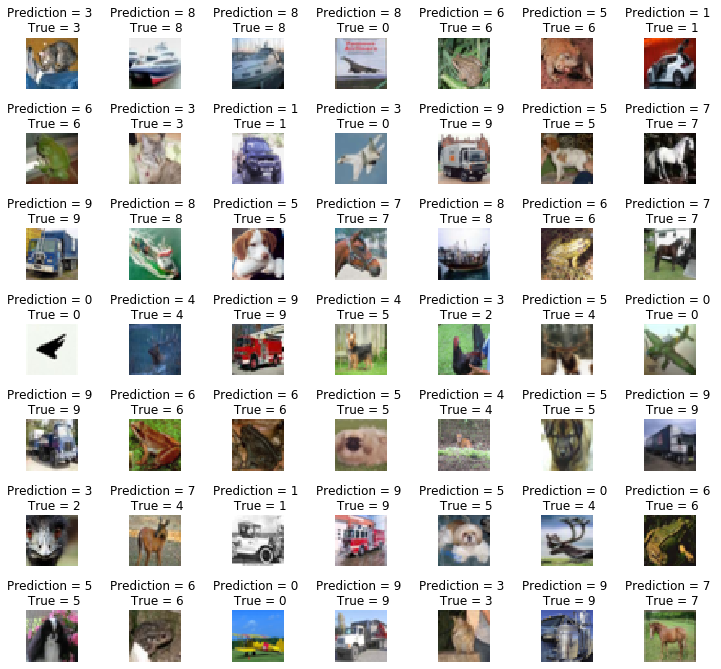

In [46]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes= axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace= 1)    
    

Awesome!

In [47]:
from sklearn.metrics import confusion_matrix


In [50]:
cm = confusion_matrix(y_test,predicted_classes)

In [51]:
cm

array([[589,  32,  16,  55,   5,  11,   2,  17, 201,  72],
       [  4, 836,   0,   5,   1,   2,   6,   3,  34, 109],
       [ 71,  19, 253, 208,  79, 166,  49,  73,  43,  39],
       [  5,  10,   7, 567,  17, 259,  22,  45,  30,  38],
       [ 18,  10,  13, 163, 424, 106,  37, 187,  26,  16],
       [  5,   8,   7, 175,   8, 697,   7,  60,  15,  18],
       [  2,   9,  10, 184,  24, 112, 586,  19,  27,  27],
       [  7,   4,   5,  39,  13,  98,   2, 798,   6,  28],
       [ 18,  27,   2,  16,   1,   3,   0,   7, 904,  22],
       [  6,  63,   1,  20,   1,   5,   2,   9,  32, 861]], dtype=int64)

# Lets Visualize!

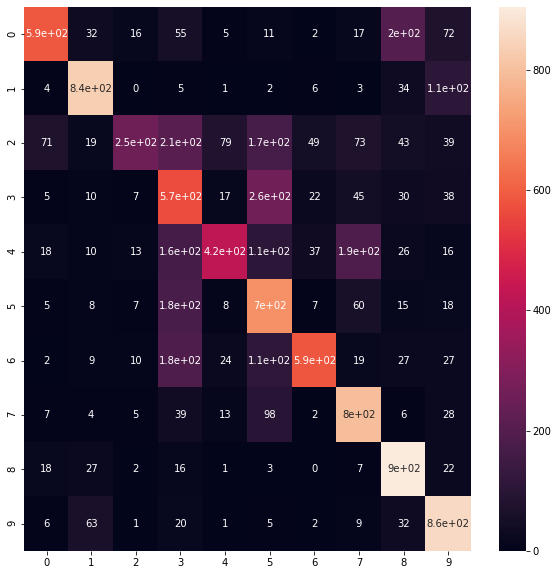

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

# Saving the model

In [55]:
import os
directory = os.path.join(os.getcwd(),'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)